# Linear Regression

In [ ]:
"""
Linear regression is a method for modeling the relationship between one or more independent
variables and a dependent variable. It is a staple of statistics and is often considered a good
introductory machine learning method. It is also a method that can be reformulated using
matrix notation and solved using matrix operations. In this tutorial, you will discover the
matrix formulation of linear regression and how to solve it using direct and matrix factorization
methods.

1. What is Linear Regression
2. Matrix Formulation of Linear Regression
3. Linear Regression Dataset
4. Solve via Inverse
5. Solve via QR Decomposition
6. Solve via SVD and Pseudoinverse
7. Solve via Convenience Function

"""

### What is Linear Regression

In [ ]:
"""
Linear regression is a method for modeling the relationship between two scalar values: the
input variable x and the output variable y. The model assumes that y is a linear function or a
weighted sum of the input variable.

y = f(x)
Or, stated with the coefficients.

y = b0 + b1 × x1

The model can also be used to model an output variable given multiple input variables called
multivariate linear regression (below, brackets were added for readability).

y = b0 + (b1 × x1) + (b2 × x2) + · · ·

The objective of creating a linear regression model is to find the values for the coefficient
values (b) that minimize the error in the prediction of the output variable y.

"""

# Matrix Formulation of Linear Regression

In [ ]:
"""
Linear regression can be stated using Matrix notation; for example:

y = X · b

Or, without the dot notation.

y = Xb

Where X is the input data and each column is a data feature, b is a vector of coefficients
and y is a vector of output variables for each row in X

X = (x1,1 x1,2 x1,3
    x2,1 x2,2 x2,3
    x3,1 x3,2 x3,3
    x4,1 x4,2 x4,3)

b =(b1
    b2
    b3)

y =(y1
    y2
    y3
    y4)

Reformulated, the problem becomes a system of linear equations where the b vector values
are unknown. This type of system is referred to as overdetermined because there are more
equations than there are unknowns, i.e. each coefficient is used on each row of data. It is a
challenging problem to solve analytically because there are multiple inconsistent solutions, e.g.
multiple possible values for the coefficients. Further, all solutions will have some error because
there is no line that will pass nearly through all points, therefore the approach to solving the
equations must be able to handle that. The way this is typically achieved is by finding a solution
where the values for b in the model minimize the squared error. This is called linear least
squares.

||X · b − y||2 =Xmi=1Xnj=1Xi,j · (bj − yi)2
This formulation has a unique solution as long as the input columns are independent (e.g.
uncorrelated).

In matrix notation, this problem is formulated using the so-named normal equation:

XT· X · b = XT· y
This can be re-arranged in order to specify the solution for b as:
b = (XT· X)−1· XT· y

"""

# Linear Regression Dataset

In [ ]:
"""
In order to explore the matrix formulation of linear regression, let’s first define a dataset as a
context. We will use a simple 2D dataset where the data is easy to visualize as a scatter plot
and models are easy to visualize as a line that attempts to fit the data points. The example
below defines a 5 × 2 matrix dataset, splits it into X and y components, and plots the dataset
as a scatter plot.
"""

In [1]:
# linear regression dataset
from numpy import array
from matplotlib import pyplot
# define dataset
data = array([
[0.05, 0.12],
[0.18, 0.22],
[0.31, 0.35],
[0.42, 0.38],
[0.5, 0.49]])
print(data)
# split into inputs and outputs
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
# scatter plot
pyplot.scatter(X, y)
pyplot.show()


[[0.05 0.12]
 [0.18 0.22]
 [0.31 0.35]
 [0.42 0.38]
 [0.5  0.49]]


<Figure size 640x480 with 1 Axes>

# Solve via Inverse

In [ ]:
"""
The first approach is to attempt to solve the regression problem directly using the matrix inverse.
That is, given X, what are the set of coefficients b that when multiplied by X will give y. As
we saw in a previous section, the normal equations define how to calculate b directly.
b = (XT· X)−1· XT· y

b = inv(X.T.dot(X)).dot(X.T).dot(y)
yhat = X.dot(b)

Putting this together with the dataset defined in the previous section, the complete example
is listed below.
"""

[1.00233226]


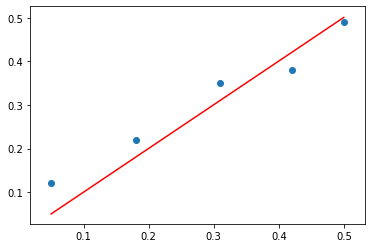

In [2]:
# direct solution to linear least squares
from numpy import array
from numpy.linalg import inv
from matplotlib import pyplot
# define dataset
data = array([
[0.05, 0.12],
[0.18, 0.22],
[0.31, 0.35],
[0.42, 0.38],
[0.5, 0.49]])
# split into inputs and outputs
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
# linear least squares
b = inv(X.T.dot(X)).dot(X.T).dot(y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()

[1.00233226]


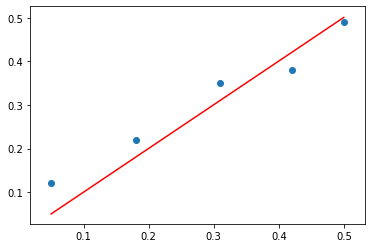

In [3]:
# QR decomposition solution to linear least squares
from numpy import array
from numpy.linalg import inv
from numpy.linalg import qr
from matplotlib import pyplot
# define dataset
data = array([
[0.05, 0.12],
[0.18, 0.22],
[0.31, 0.35],
[0.42, 0.38],
[0.5, 0.49]])
# split into inputs and outputs
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
# factorize
Q, R = qr(X)
b = inv(R).dot(Q.T).dot(y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()


[1.00233226]


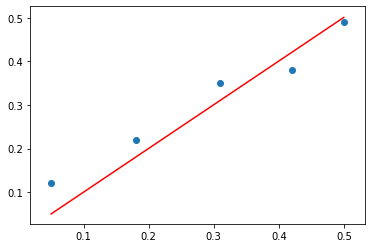

In [4]:
# SVD solution via pseudoinverse to linear least squares
from numpy import array
from numpy.linalg import pinv
from matplotlib import pyplot
# define dataset
data = array([
[0.05, 0.12],
[0.18, 0.22],
[0.31, 0.35],
[0.42, 0.38],
[0.5, 0.49]])
# split into inputs and outputs
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
# calculate coefficients
b = pinv(X).dot(y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()
